In [8]:
import pandas as pd
import numpy as np


In [9]:
mk=pd.read_csv(r"D:\Mohsin_project\data\cubic_zirconia.csv")

In [10]:
mk.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [11]:
mk.shape

(26967, 11)

In [12]:
mk.drop(columns="Unnamed: 0", inplace=True)

In [13]:
mk.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [14]:
mk.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [15]:
mk.dropna(inplace=True)

In [16]:
mk.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [17]:
mk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26270 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26270 non-null  float64
 1   cut      26270 non-null  object 
 2   color    26270 non-null  object 
 3   clarity  26270 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26270 non-null  float64
 6   x        26270 non-null  float64
 7   y        26270 non-null  float64
 8   z        26270 non-null  float64
 9   price    26270 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.2+ MB


In [18]:
categorical_cols=mk.columns[mk.dtypes=="object"]


In [19]:
numerical_cols=mk.columns[mk.dtypes!="object"]

In [20]:
mk[categorical_cols]

,cut,color,clarity
0,Ideal,E,SI1
1,Premium,G,IF
2,Very Good,E,VVS2
3,Ideal,F,VS1
4,Ideal,F,VVS1
...,...,...,...
26962,Premium,G,SI1
26963,Ideal,H,IF
26964,Premium,E,VS2
26965,Very Good,F,VVS2


In [21]:
mk[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26270.0,0.797995,0.477214,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26270.0,57.456011,2.230776,49.0,56.00,57.00,59.00,79.00
x,26270.0,5.729167,1.127515,0.0,4.71,5.69,6.55,10.23
y,26270.0,5.732967,1.166330,0.0,4.72,5.70,6.54,58.90
z,26270.0,3.536636,0.699335,0.0,2.90,3.52,4.04,8.06
price,26270.0,3937.973734,4022.189341,326.0,945.00,2375.00,5361.00,18818.00


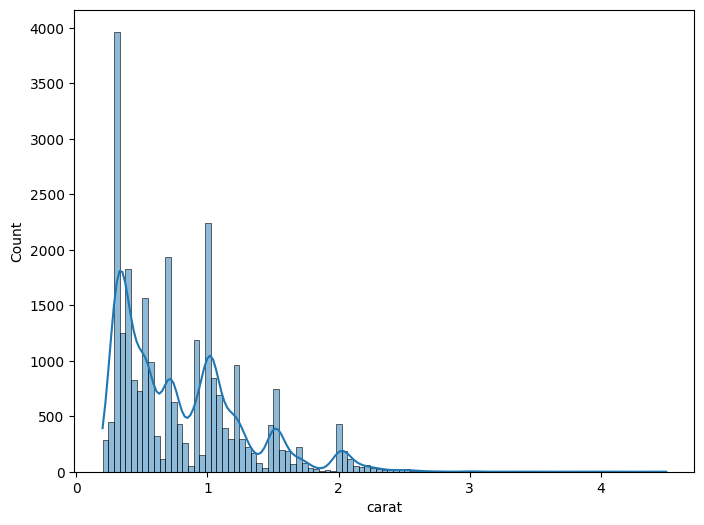

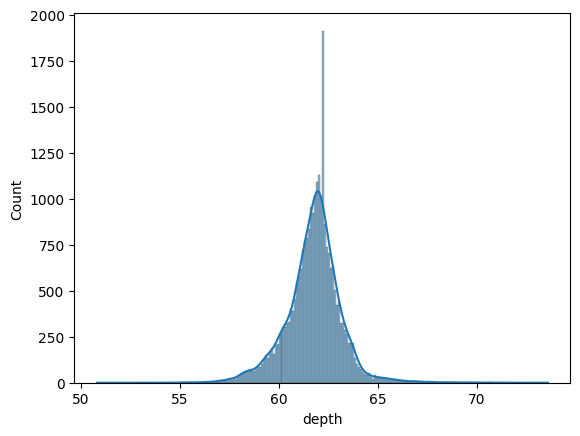

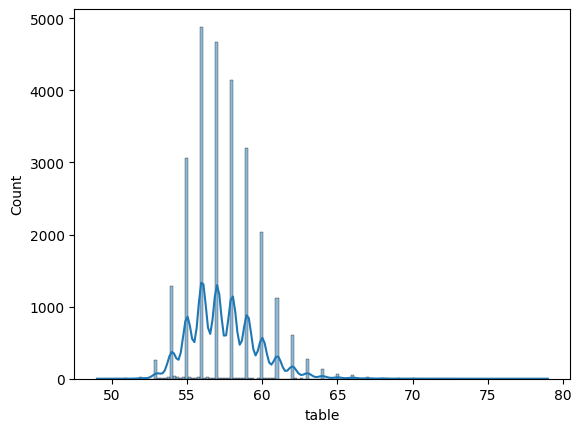

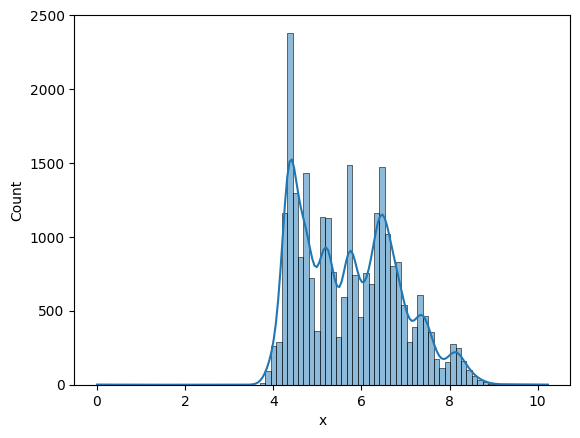

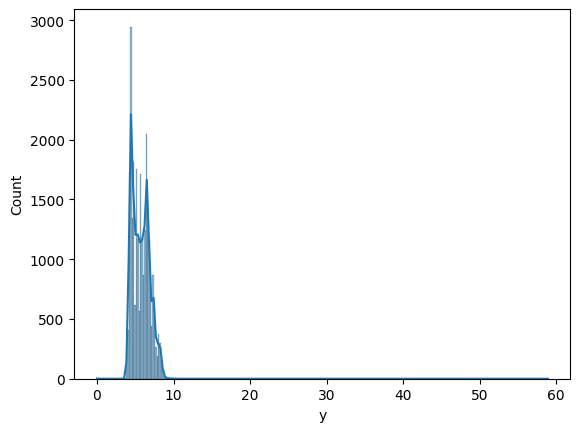

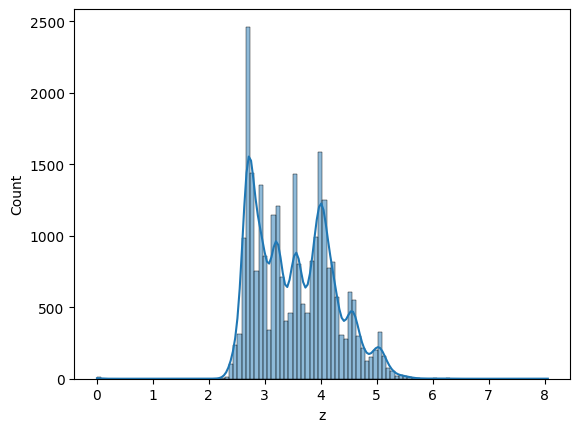

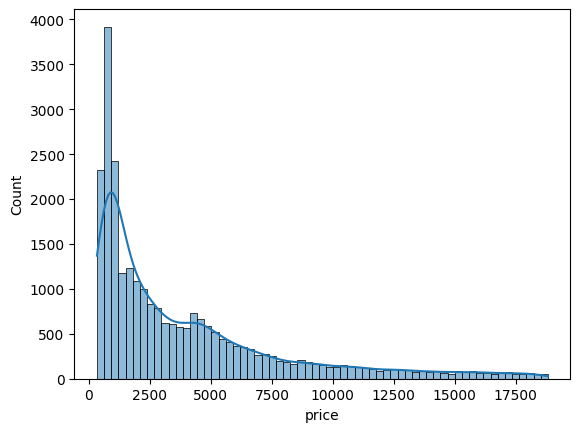

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))

for col in numerical_cols:
    sns.histplot(data=mk, x=col, kde=True)
    print("\n")
    plt.show()

<Axes: >

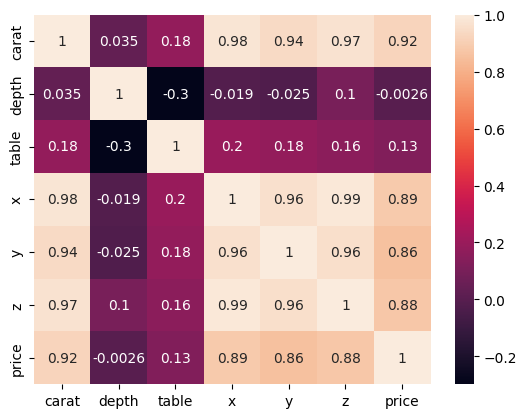

In [23]:
sns.heatmap(mk[numerical_cols].corr(), annot=True)

In [24]:
print("Cut values:\n", mk["cut"].unique())
print("\nColor values:\n", mk["color"].unique())
print("\nClarity values:\n", mk["clarity"].unique())


Cut values:
 ['Ideal' 'Premium' 'Very Good' 'Good' 'Fair']

Color values:
 ['E' 'G' 'F' 'D' 'H' 'J' 'I']

Clarity values:
 ['SI1' 'IF' 'VVS2' 'VS1' 'VVS1' 'VS2' 'SI2' 'I1']


In [25]:
cut_map={'Ideal':5, 'Premium':4, 'Very Good':3, 'Good':2, 'Fair':1}
color_map={'D':1, 'E':2, 'F':3, 'G':4, 'H':5, 'I':6, 'J':7}
clarity_map={'SI1':3, 'IF':7, 'VVS2':6, 'VS1':5, 'VVS1':7, 'VS2':4, 'SI2':2, 'I1':1}

In [26]:
mk["cut"]=mk["cut"].map(cut_map)
mk["color"]=mk["color"].map(color_map)
mk["clarity"]=mk["clarity"].map(clarity_map)

In [27]:
mk.head()   

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,5,2,3,62.1,58.0,4.27,4.29,2.66,499
1,0.33,4,4,7,60.8,58.0,4.42,4.46,2.70,984
2,0.90,3,2,6,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,5,3,5,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,5,3,7,60.4,59.0,4.35,4.43,2.65,779
